In [1]:
import cv2 
import matplotlib.pyplot as plt
import os

In [2]:
cv2.__version__

'4.5.1'

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

In [4]:
# Super Resolution
path = "ESPCN/ESPCN_x4.pb"
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(path)
sr.setModel("espcn",4)

In [23]:
prev_path = "previous_img/"
cur_path = "current_img/"
prev_img = []
cur_img = []
prev_img_list = os.listdir(prev_path)
print(prev_img_list)
cur_img_list = os.listdir(cur_path)
print(cur_img_list)
#print('Total Classes Detected', len(pre_img_list))
class_names = []

for cl in prev_img_list:
    img = cv2.imread(prev_path + cl)
    img = sr.upsample(img) # Super Resolution
    img  = cv2.detailEnhance(img,sigma_s=15, sigma_r=0.15)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.pyrUp(img)
    img = cv2.pyrUp(img)
    prev_img.append(img)
    class_names.append(os.path.splitext(cl)[0])

for cl in cur_img_list:
    img = cv2.imread(cur_path + cl)
    img = sr.upsample(img) # Super Resolution
    img  = cv2.detailEnhance(img,sigma_s=15, sigma_r=0.15)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.pyrUp(img)
    img = cv2.pyrUp(img)
    cur_img.append(img)
    
print(class_names)

['id_003.png', 'id_005.png', 'id_002.png', 'id_004.png', 'id_001.png']
['id_003.png', 'id_005.png', 'id_002.png', 'id_004.png', 'id_001.png']
['id_003', 'id_005', 'id_002', 'id_004', 'id_001']


In [24]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

(22, 29)

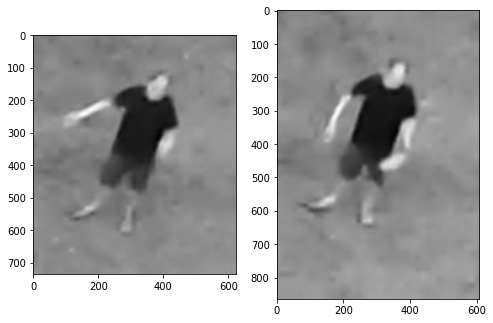

In [25]:
# show image1
figure, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(prev_img[0], cmap='gray')
ax[1].imshow(cur_img[0], cmap='gray')
# sift images1
kp1p, des1p = sift.detectAndCompute(prev_img[0],None)
kp1n, des1n = sift.detectAndCompute(cur_img[0],None)
len(kp1p), len(kp1n)

amount of match features:11


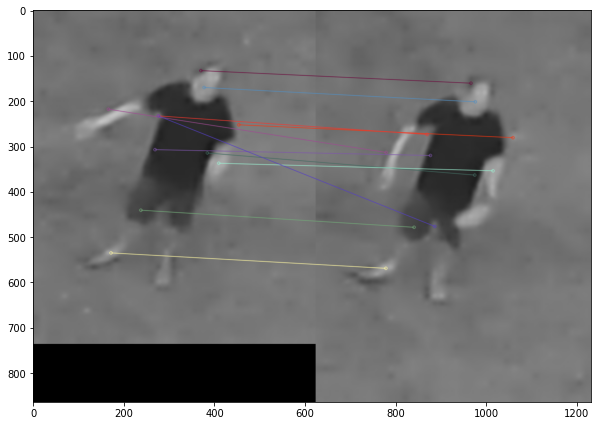

In [26]:
matches1 = bf.match(des1p, des1n)
matches1 = sorted(matches1, key = lambda x:x.distance)
print("amount of match features:" + str(len(matches1)))
imgc1 = cv2.drawMatches(prev_img[0], kp1p, cur_img[0], kp1n, matches1[:50], cur_img[0], flags=2)
plt.figure(figsize = (10,10))
plt.imshow(imgc1)
plt.show()

(17, 20)

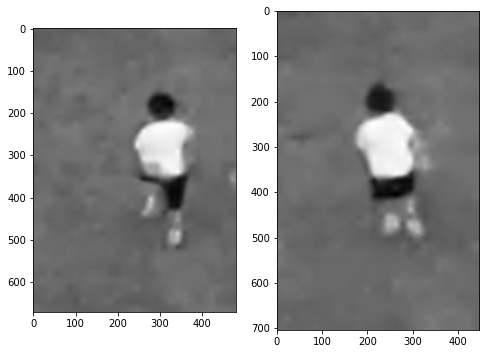

In [27]:
# show image2
figure, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(prev_img[1], cmap='gray')
ax[1].imshow(cur_img[1], cmap='gray')
kp2p, des2p = sift.detectAndCompute(prev_img[1],None)
kp2n, des2n = sift.detectAndCompute(cur_img[1],None)
len(kp2p), len(kp2n)

amount of match features:11


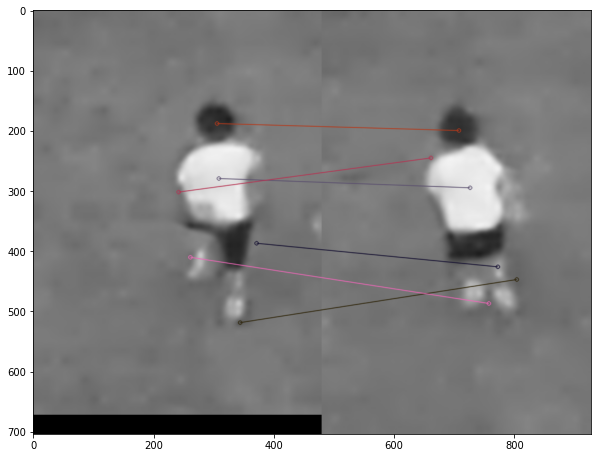

In [28]:
matches2 = bf.match(des2p, des2n)
matches2 = sorted(matches2, key = lambda x:x.distance)
print("amount of match features:" + str(len(matches1)))
imgc2 = cv2.drawMatches(prev_img[1], kp2p, cur_img[1], kp2n, matches2[:50], cur_img[1], flags=2)
plt.figure(figsize = (10,10))
plt.imshow(imgc2)
plt.show()

(63, 52)

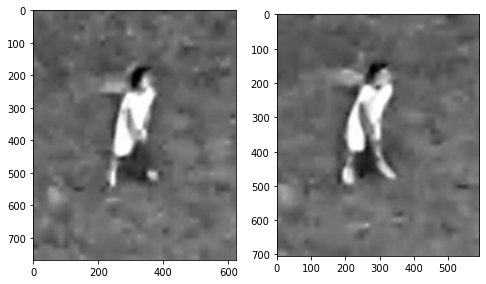

In [11]:
# show image3
figure, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(prev_img[2], cmap='gray')
ax[1].imshow(cur_img[2], cmap='gray')
kp3p, des3p = sift.detectAndCompute(prev_img[2],None)
kp3n, des3n = sift.detectAndCompute(cur_img[2],None)
len(kp3p), len(kp3n)

amount of match features:30


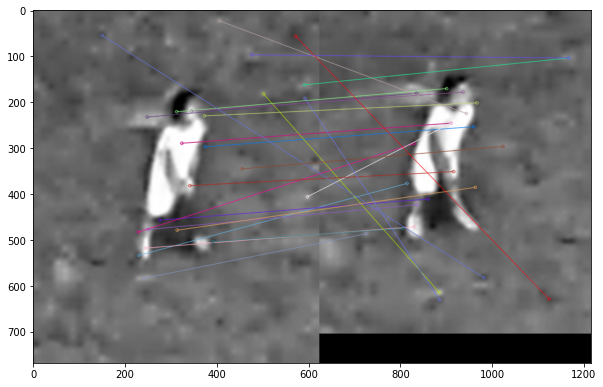

In [12]:
matches3 = bf.match(des3p, des3n)
matches3 = sorted(matches3, key = lambda x:x.distance)
print("amount of match features:" + str(len(matches1)))
imgc3 = cv2.drawMatches(prev_img[2], kp3p, cur_img[2], kp3n, matches3[:50], cur_img[2], flags=2)
plt.figure(figsize = (10,10))
plt.imshow(imgc3)
plt.show()

amount of match features:30


(58, 58)

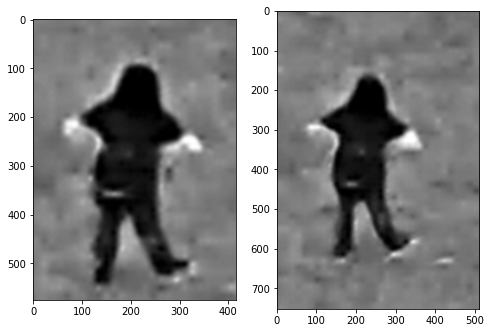

In [13]:
# show image4
figure, ax = plt.subplots(1, 2, figsize=(8, 8))
print("amount of match features:" + str(len(matches1)))
ax[0].imshow(prev_img[3], cmap='gray')
ax[1].imshow(cur_img[3], cmap='gray')
kp4p, des4p = sift.detectAndCompute(prev_img[3],None)
kp4n, des4n = sift.detectAndCompute(cur_img[3],None)
len(kp4p), len(kp4n)

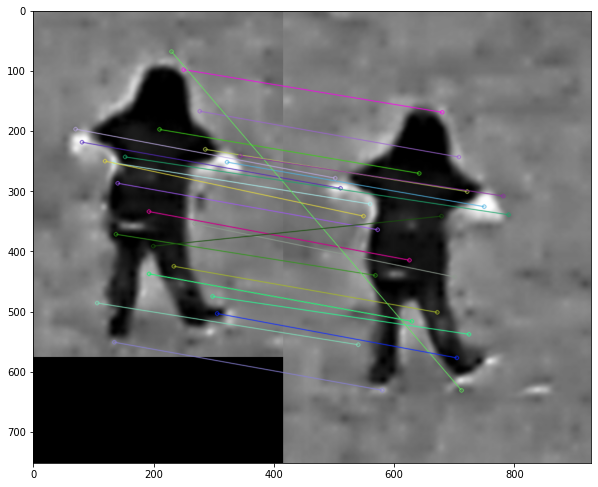

In [14]:
matches4 = bf.match(des4p, des4n)
matches4 = sorted(matches4, key = lambda x:x.distance)
imgc4 = cv2.drawMatches(prev_img[3], kp4p, cur_img[3], kp4n, matches4[:50], cur_img[3], flags=2)
plt.figure(figsize = (10,10))
plt.imshow(imgc4)
plt.show()

(69, 71)

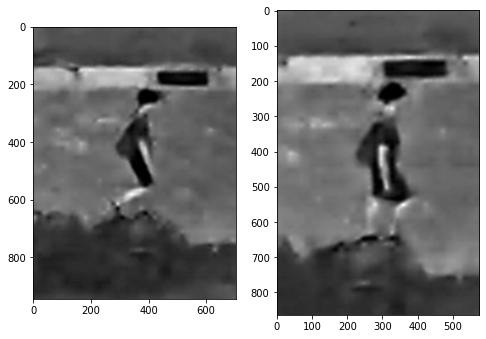

In [15]:
# show image5
figure, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(prev_img[4], cmap='gray')
ax[1].imshow(cur_img[4], cmap='gray')
kp5p, des5p = sift.detectAndCompute(prev_img[4],None)
kp5n, des5n = sift.detectAndCompute(cur_img[4],None)
len(kp5p), len(kp5n)

amount of match features:30


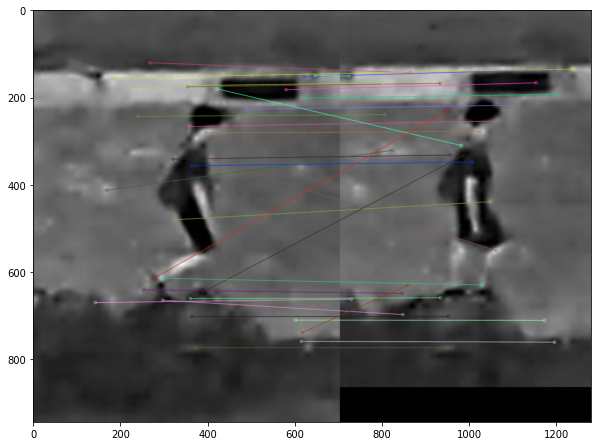

In [16]:
matches5 = bf.match(des5p, des5n)
matches5 = sorted(matches5, key = lambda x:x.distance)
print("amount of match features:" + str(len(matches1)))
imgc5 = cv2.drawMatches(prev_img[4], kp5p, cur_img[4], kp5n, matches5[:50], cur_img[4], flags=2)
plt.figure(figsize = (10,10))
plt.imshow(imgc5)
plt.show()